In [1]:
import itertools
import os
import csv
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmp
#from datetime import datetime
from IPython.display import display
%matplotlib inline
import sys
import seaborn as sns
sys.version
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [4]:
def row_count(filename):
    with open(filename) as in_file:
        return sum(1 for _ in in_file)


In [5]:
# big_file_rowcount = row_count(file_train)
# print(big_file_rowcount)

In [6]:
fpath = './/Data//stores.csv'
df_stores = pd.read_csv(fpath)

fpath = './/Data//items.csv'
df_items = pd.read_csv(fpath)

fpath = './/Data//transactions.csv'
df_transactions = pd.read_csv(fpath, parse_dates=['date'])

fpath = './/Data//oil.csv'
df_oil = pd.read_csv(fpath, parse_dates=['date'])

fpath = './/Data//holidays_events.csv'
df_holidays_events = pd.read_csv(fpath, parse_dates=['date'])

# df_transactions['ddate'] = pd.to_datetime(df_transactions['date'])
# df_holidays_events['ddate'] = pd.to_datetime(df_holidays_events['date'])


# fpath = './/Data//stores.csv'
# df_stores = pd.read_csv(fpath)

In [8]:
#df_stores.groupby(['cluster', 'type', 'state']).count()

In [9]:
store_number = 29
store_path = 'C:\\Users\\ppsheehy\\Documents\\Github\\Kaggle\\Favorita\\Output\\'
df = pd.read_csv(store_path + 'Store_' + str(store_number) +'.csv', parse_dates=['date'])


In [10]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,43235806,2015-03-20,29,103501,19.0,False
1,43235807,2015-03-20,29,103520,2.0,False
2,43235808,2015-03-20,29,103665,2.0,False
3,43235809,2015-03-20,29,105576,20.0,False
4,43235810,2015-03-20,29,105693,22.0,False


In [11]:
national_hols = df_holidays_events[df_holidays_events['locale']=='National']

#remove transferred hols (these are actually work days)
national_hols = national_hols[~national_hols['transferred']]
#remove Work Days
national_hols = national_hols[~(national_hols['type'] == 'Work Day')]
# get rid of duplicated National holiday dates
national_hols = national_hols.drop_duplicates('date')
#national_hols[national_hols_index.index]
# national_hols = national_hols[(pd.to_datetime(national_hols['date'])>=datetime.datetime(2013,1,1)) & 
#                               (pd.to_datetime(national_hols['date'])<datetime.datetime(2014,1,1))]
# remove Additional holidays
national_hols = national_hols[~(national_hols['type']== 'Additional')]

national_hols['ddate']=pd.to_datetime(national_hols['date'])
national_hols

,date,type,locale,locale_name,description,transferred,ddate
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,2012-08-10
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,2012-10-12
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,2012-11-02
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,2012-11-03
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,2012-12-24
37,2012-12-25,Holiday,National,Ecuador,Navidad,False,2012-12-25
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False,2012-12-31
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2013-02-11
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False,2013-02-12


In [12]:

local_hols = df_holidays_events[df_holidays_events['locale']!='National']

#remove transferred hols (these are actually work days)
local_hols = local_hols[~local_hols['transferred']]
#remove Work Days
local_hols = local_hols[~(local_hols['type'] == 'Work Day')]
# get rid of duplicated National holiday dates
#local_hols = local_hols.drop_duplicates('date')
#national_hols[national_hols_index.index]
# national_hols = national_hols[(pd.to_datetime(national_hols['date'])>=datetime.datetime(2013,1,1)) & 
#                               (pd.to_datetime(national_hols['date'])<datetime.datetime(2014,1,1))]
# remove Additional holidays
local_hols = local_hols[~(local_hols['type']== 'Additional')]
local_hols.head()
local_hols['ddate']=pd.to_datetime(local_hols['date'])
local_hols#[local_hols['locale_name']=='Manta']
# df_store_trans['nat_hol'] = df_store_trans['ddate'].isin ([d for d in national_hols['ddate']])


# #datetime.time(0, 0, 0) < df.time() < datetime.time(7, 59, 59)

,date,type,locale,locale_name,description,transferred,ddate
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012-03-02
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012-04-01
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012-04-12
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012-04-14
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012-04-21
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,2012-05-12
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,2012-06-23
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,2012-06-25
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,2012-06-25
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False,2012-06-25


In [13]:
hol_state = pd.merge(df_stores, local_hols, how = 'left', left_on=['state'],right_on=['locale_name'])
hol_state = hol_state.dropna(axis=0)

hol_city = pd.merge(df_stores, local_hols, how = 'left', left_on=['city'],right_on=['locale_name'])
hol_city = hol_city.dropna(axis=0)

In [14]:
local_hols#.groupby('locale_name').count()

,date,type,locale,locale_name,description,transferred,ddate
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012-03-02
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012-04-01
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012-04-12
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012-04-14
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012-04-21
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False,2012-05-12
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,2012-06-23
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,2012-06-25
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,2012-06-25
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False,2012-06-25


In [15]:
store_hols = pd.concat([hol_city, hol_state], axis=0, ignore_index=False)

In [294]:
national_hols#.head()

,date,type,locale,locale_name,description,transferred,ddate
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,2012-08-10
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,2012-10-12
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,2012-11-02
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,2012-11-03
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,2012-12-24
37,2012-12-25,Holiday,National,Ecuador,Navidad,False,2012-12-25
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False,2012-12-31
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2013-02-11
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False,2013-02-12


In [17]:
hol_national = pd.merge(national_hols, df_stores, how = 'left')
hol_national = hol_national.dropna(axis=0)

In [ ]:
def create_holiday_mask(store_id, store_hols):
    hols = store_hols[store_hols['store_nbr']==store_id]
    

In [750]:
df_stores.sort_values(['type', 'cluster', 'city'])

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5
51,52,Manta,Manabi,A,11
44,45,Quito,Pichincha,A,11
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
50,51,Guayaquil,Guayas,A,17
10,11,Cayambe,Pichincha,B,6


## Select Number

In [800]:
t = df_store_trans.groupby(['store_nbr', 'cluster', 'type']).mean()
t.sort_values('transactions', ascending=False)

,,,transactions
store_nbr,cluster,type,
44,5,A,4336.966607
47,14,A,3897.322600
45,11,A,3697.742993
46,14,A,3571.921884
3,8,D,3201.879475
48,14,A,3045.787120
8,8,D,2767.285800
49,11,A,2727.550984
50,14,A,2614.456768


In [1119]:
store_number = 46
store_path = 'C:\\Users\\ppsheehy\\Documents\\Github\\Kaggle\\Favorita\\Output\\'
df = pd.read_csv(store_path + 'Store_' + str(store_number) +'.csv', parse_dates=['date'],dtype={'onpromotion': bool} )

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## There seems to be a lot of data missing prior to 2015 for many stores

In [1120]:
df = df[df['date']>'2015-06-01']

In [1121]:
df_store_trans =pd.merge(df_stores, df_transactions, on= 'store_nbr') 
transdates = df_store_trans[df_store_trans['store_nbr']==store_number]
transdates = transdates.set_index('date', drop=True)
transdates = transdates.drop(['store_nbr', 'city', 'state', 'type', 'cluster'], axis =1)
#plt.plot(transdates['transactions']);

In [1122]:
transdates['dow'] = transdates.index.dayofweek.astype('str')
transdates['month'] = transdates.index.month.astype('str')
hols = store_hols[store_hols['store_nbr']==store_number]
sales = df[['unit_sales', 'date']].groupby('date').sum()

In [1176]:
item_sales = pd.merge(df,df_items, how = 'left', on='item_nbr')
item_sales_fam = item_sales[['unit_sales','date', 'family']].groupby(['date', 'family']).sum()
item_sales_cla = item_sales[['unit_sales','date', 'family', 'class']].groupby(['date', 'class']).sum()
item_sales_fam
tot_item_sales_fam = item_sales[['unit_sales', 'family']].groupby(['family']).sum()
#tot_item_sales_fam.sort_values(by='unit_sales', ascending=False)

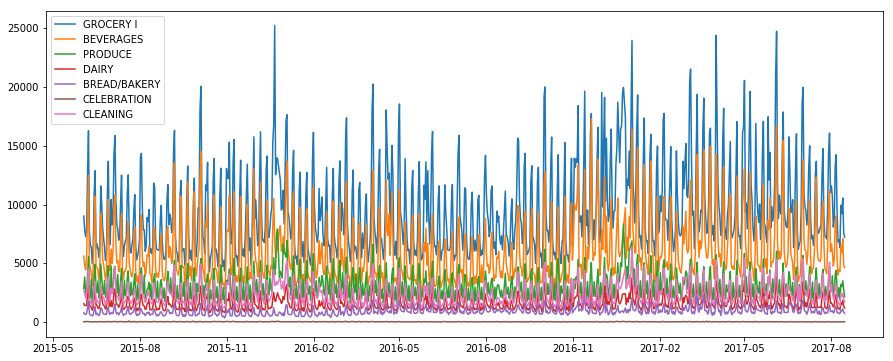

In [1177]:
# test = dfig[dfig.index.get_level_values('family') =='GROCERY I']['unit_sales']
y = item_sales_fam[item_sales_fam.index.get_level_values('family') == 'GROCERY I']
x = y.index.get_level_values('date')
plt.plot(x, y['unit_sales'].values, label='GROCERY I')
for f in [ 'BEVERAGES', 'PRODUCE','DAIRY', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING']:
    y = item_sales_fam[item_sales_fam.index.get_level_values('family') == f]
    x = y.index.get_level_values('date')
    plt.plot(x,y['unit_sales'].values, label=f)
    #plt.plot(y['unit_sales'].values, label=f)
    plt.ylabel = f
plt.legend();


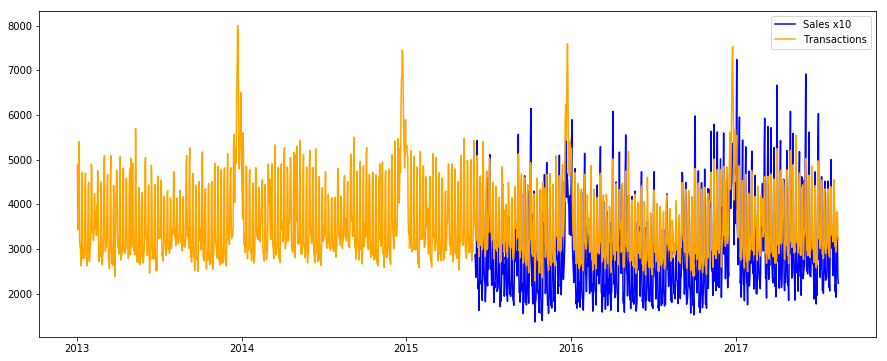

In [1178]:
plt.plot(sales/10, c = 'blue', label = 'Sales x10');
plt.plot(transdates['transactions'], c = 'orange', label = 'Transactions');
plt.legend();

In [1257]:
#item_sales.head()
item_sales = item_sales[item_sales['family']=='BEVERAGES']
item_sales.reset_index()[(item_sales.reset_index()['item_nbr']==1943792) & (item_sales.reset_index()['unit_sales']>=70)]

,index,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
59329,404536,63287363,2015-11-27,46,1943792,78.0,False,BEVERAGES,1114,0
59703,407093,63383232,2015-11-28,46,1943792,86.0,False,BEVERAGES,1114,0
60089,409667,63482110,2015-11-29,46,1943792,135.0,False,BEVERAGES,1114,0
64422,438871,64611566,2015-12-11,46,1943792,174.0,False,BEVERAGES,1114,0
198353,1326139,98596323,2016-12-01,46,1943792,1306.0,False,BEVERAGES,1114,0
203839,1361207,99951540,2016-12-14,46,1943792,149.0,False,BEVERAGES,1114,0


In [1208]:
test = item_sales.pivot_table(index = 'date', columns=['class', 'item_nbr'],values='unit_sales', )

In [1209]:
test

class         1114                                                          \
item_nbr   1463555 1463619 1463620 1463621 1463767 1463769 1463770 1463771   
date                                                                         
2015-06-02     2.0     NaN     NaN     2.0     5.0    13.0    16.0    14.0   
2015-06-03     1.0     NaN     NaN     NaN    11.0    12.0     4.0    27.0   
2015-06-04     NaN     NaN     NaN     NaN     7.0    13.0    12.0    17.0   
2015-06-05     2.0     NaN     NaN     NaN    16.0    20.0    11.0    20.0   
2015-06-06     1.0     NaN     NaN     2.0     7.0    14.0    13.0    45.0   
2015-06-07     1.0     NaN     NaN     1.0    27.0    29.0    28.0    30.0   
2015-06-08     NaN     NaN     8.0     8.0    11.0    16.0    14.0    10.0   
2015-06-09     NaN     NaN     9.0     4.0     4.0    10.0    13.0     5.0   
2015-06-10     NaN     NaN     3.0     2.0     6.0    10.0     9.0    14.0   
2015-06-11     9.0     NaN     4.0     3.0    10.0    11.0     4.0    12.0   
2015-06-12     NaN     NaN     4.0     3.0    13.0    10.0     6.0    12.0   
2015-06-13     NaN     NaN    10.0     3.0    12.0    19.0    17.0    24.0   
2015-06-14     NaN     NaN     8.0     1.0     8.0    23.0    29.0    27.0   
2015-06-15     1.0     NaN     7.0     5.0     4.0    12.0     7.0    12.0   
2015-06-16     NaN     NaN     5.0     2.0    18.0    14.0     5.0    10.0   
2015-06-17     NaN     NaN     6.0     4.0     8.0    11.0     8.0    10.0   
2015-06-18     NaN     NaN     5.0     1.0     6.0     7.0     3.0    13.0   
2015-06-19     NaN     NaN     7.0     2.0    18.0    10.0     4.0    14.0   
2015-06-20     1.0     NaN     6.0     6.0     8.0    17.0    15.0    24.0   
2015-06-21     1.0     NaN     7.0     2.0    11.0    22.0    24.0    19.0   
2015-06-22     1.0     NaN     8.0    10.0    11.0    17.0     9.0    15.0   
2015-06-23     NaN     NaN    12.0     1.0    11.0    13.0     6.0    15.0   
2015-06-24     NaN     NaN     3.0     3.0     9.0     6.0     5.0     8.0   
2015-06-25     NaN     NaN     3.0     3.0     6.0     5.0     5.0     8.0   
2015-06-26     2.0     NaN     4.0     4.0     4.0     5.0     6.0     7.0   
2015-06-27     1.0     NaN     6.0     7.0    11.0    13.0    22.0    14.0   
2015-06-28     6.0     NaN     9.0     8.0    10.0    24.0    19.0    18.0   
2015-06-29     5.0     NaN     5.0    10.0     5.0     9.0     8.0    15.0   
2015-06-30     2.0     NaN     8.0     7.0     4.0    10.0     9.0    16.0   
2015-07-01     1.0     NaN     9.0     5.0     9.0    20.0    15.0    11.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-07-17     1.0     NaN     NaN     3.0     6.0     NaN     9.0    15.0   
2017-07-18     NaN     1.0     NaN     1.0     9.0     NaN     7.0     9.0   
2017-07-19     6.0     2.0     NaN     1.0    15.0     NaN     5.0    14.0   
2017-07-20     NaN     3.0     NaN     NaN    14.0     NaN     7.0    23.0   
2017-07-21     6.0     NaN     NaN     NaN    17.0     NaN     7.0     6.0   
2017-07-22     1.0     NaN     NaN     NaN    24.0     NaN    18.0    21.0   
2017-07-23     NaN     NaN     NaN     NaN    25.0     NaN    17.0    26.0   
2017-07-24     7.0     NaN     NaN     NaN     7.0     NaN     6.0    19.0   
2017-07-25     NaN     NaN     NaN     NaN    20.0     NaN     8.0    13.0   
2017-07-26     2.0     NaN     NaN     NaN    13.0     2.0     7.0    10.0   
2017-07-27     NaN     NaN     NaN     NaN     7.0     3.0     6.0     6.0   
2017-07-28     1.0     NaN     NaN     NaN    31.0     3.0     8.0     9.0   
2017-07-29     1.0     NaN     NaN     NaN    21.0     5.0    18.0    14.0   
2017-07-30     NaN     NaN     3.0     3.0    31.0    12.0    16.0    13.0   
2017-07-31     NaN     NaN     5.0     3.0    21.0     2.0    14.0    14.0   
2017-08-01     NaN     2.0     4.0     3.0    13.0     9.0    25.0    14.0   
2017-08-02     NaN     NaN     3.0     3.0    10.0     8.0    16.0     7.0   
2017-08-03     1.0    

In [1247]:
cl = test.iloc[:,test.columns.get_level_values('class')==1114]
it = test.iloc[:,test.columns.get_level_values('item_nbr')==1463771]

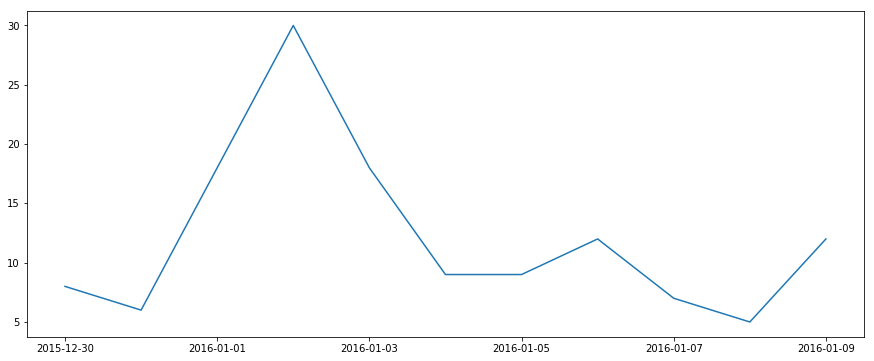

In [1262]:
it = test.iloc[:,test.columns.get_level_values('item_nbr')==1464208]#1943792]
plt.plot(it[210:220])

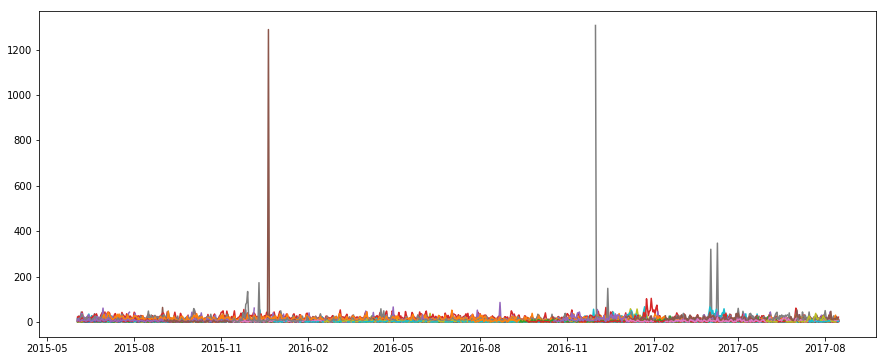

In [1231]:
for i in cl.columns.get_level_values('item_nbr'):
    plt.plot(test.iloc[:,test.columns.get_level_values('item_nbr')==i])
    plt.ylim=200

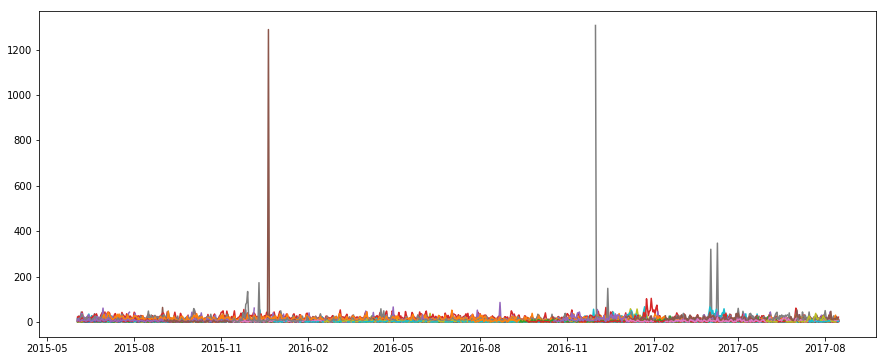

In [1238]:
plt.plot(test.iloc[:,test.columns.get_level_values('class')==1114]);
# for i in cl.columns.get_level_values('class'):
#     plt.plot(test.iloc[:,test.columns.get_level_values('class')==i])

In [1246]:
test.iloc[:,test.columns.get_level_values('class')==1114].sum()/test.iloc[:,test.columns.get_level_values('class')==1114].sum().sum()

class  item_nbr
1114   1463555     0.007973
       1463619     0.011290
       1463620     0.018017
       1463621     0.015957
       1463767     0.036080
       1463769     0.039607
       1463770     0.038920
       1463771     0.066557
       1463772     0.037436
       1463773     0.055349
       1463783     0.027689
       1463784     0.012966
       1463914     0.013839
       1464045     0.105972
       1464207     0.049867
       1464208     0.048639
       1464209     0.031960
       1464210     0.059795
       1464256     0.005977
       1464257     0.016283
       1464258     0.017813
       1464312     0.051124
       1466039     0.001199
       1466047     0.020979
       1466049     0.028876
       1917879     0.019326
       1943435     0.016591
       1943792     0.048103
       1944889     0.005819
       1950405     0.003818
       1960256     0.000268
       1976710     0.021753
       2013309     0.011592
       2013450     0.006320
       2018612     0.012174
    

In [1250]:
test.iloc[:,test.columns.get_level_values('class')==1114].std()

class  item_nbr
1114   1463555      3.043578
       1463619      2.728573
       1463620      2.723132
       1463621      2.552737
       1463767      4.732501
       1463769      5.377557
       1463770      5.076968
       1463771     17.833544
       1463772      7.914357
       1463773      9.181667
       1463783      3.752636
       1463784      3.439117
       1463914      2.107670
       1464045     11.315159
       1464207      9.755448
       1464208     45.859721
       1464209      3.976391
       1464210      8.653489
       1464256      2.510959
       1464257      2.470187
       1464258      3.007721
       1464312      8.322193
       1466039      0.665198
       1466047      2.953766
       1466049      4.869981
       1917879      3.233697
       1943435      2.715021
       1943792     55.220729
       1944889      2.741132
       1950405      1.161665
       1960256      1.011520
       1976710      5.833188
       2013309      3.877194
       2013450      2.50765

In [1166]:
from sklearn import preprocessing
x = test.fillna(0)
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)
test_out = pd.DataFrame(x_scaled)

In [1167]:
test_out.columns = test.columns
test_out

class,1114,1115,1116,1118,1120,1122,1124,1126,1132,1136,...,1142,1144,1146,1148,1150,1152,1153,1154,1156,1190
0,0.085433,0.261905,0.296302,0.477780,0.059859,0.198089,0.198969,0.057483,0.525386,0.400870,...,0.000000,0.366777,0.074492,0.143473,0.0,0.200000,0.000000,0.0,0.000000,0.392413
1,0.125828,0.190476,0.265532,0.464294,0.074380,0.139639,0.173603,0.029046,0.168046,0.141300,...,0.000000,0.337217,0.046981,0.129830,0.0,0.280000,0.000000,0.0,0.000000,0.285035
2,0.108777,0.095238,0.216370,0.455008,0.101093,0.154153,0.149570,0.047733,0.123620,0.187961,...,0.000000,0.203229,0.059678,0.129687,0.0,0.160000,0.000000,0.0,0.000000,0.281593
3,0.118807,0.166667,0.144516,0.458435,0.141491,0.235678,0.140045,0.073732,0.206678,0.298432,...,0.000000,0.375688,0.040632,0.198111,0.0,0.120000,0.333333,0.0,0.000000,0.245649
4,0.190188,0.190476,0.356439,0.494362,0.262703,0.288746,0.267684,0.163917,0.105960,0.441659,...,0.000000,0.689708,0.078725,0.320771,0.0,0.140000,0.166667,0.0,0.000000,0.553766
5,0.297562,0.404762,0.632215,0.611320,0.342752,0.293821,0.426211,0.213478,0.396615,0.714208,...,0.000000,0.984367,0.099887,0.425049,0.0,0.180000,0.000000,0.0,0.000000,0.901140
6,0.127405,0.214286,0.209824,0.474243,0.083996,0.147991,0.138021,0.044077,0.207751,0.210055,...,0.000000,0.360865,0.042748,0.161221,0.0,0.080000,0.166667,0.0,0.000000,0.243732
7,0.103702,0.142857,0.152080,0.459153,0.053272,0.107538,0.146626,0.036271,0.399834,0.165866,...,0.000000,0.370869,0.038516,0.151241,0.0,0.200000,0.000000,0.0,0.000000,0.289572
8,0.080358,0.214286,0.140735,0.453405,0.069331,0.184488,0.096174,0.028233,0.181997,0.240914,...,0.000000,0.219467,0.059678,0.104180,0.0,0.080000,0.333333,0.0,0.000000,0.231059
9,0.049802,0.119048,0.093463,0.442866,0.036522,0.104134,0.087390,0.016859,0.039735,0.089386,...,0.000000,0.107137,0.017353,0.075069,0.0,0.140000,0.000000,0.0,0.000000,0.149435


In [1168]:
from sklearn.cluster import FeatureAgglomeration
feat = FeatureAgglomeration(n_clusters= 9, affinity=pearson_affinity, linkage = 'complete') #affinity=pearson_affinity
f = feat.fit(test_out)


In [1169]:
clustered_test = pd.DataFrame(columns=test.columns)
clustered_test.loc[0]=list(f.labels_)
ctv = clustered_test.T.sort_values(0)
# for i, j in enumerate(ctv.values):
#     print(i,j)
ctv

,0
class,
1115,0
1132,0
1114,1
1148,1
1144,1
1142,1
1136,1
1138,1
1124,1


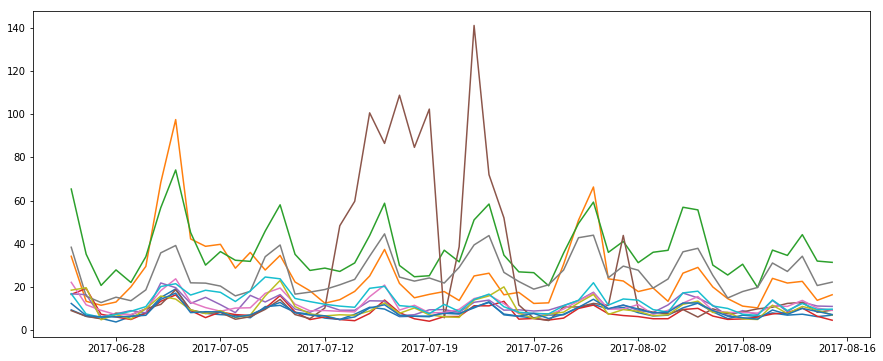

In [1175]:
for i in ctv.index:
    #print(i, ctv.loc[i,0])
    if ctv.loc[i,0]==1:
        plt.plot(test[i][750:])

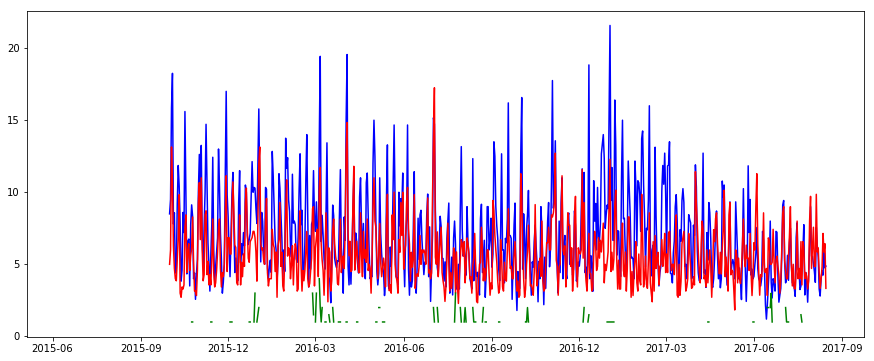

In [1146]:
# plt.plot(test_out['PLAYERS AND ELECTRONICS'])
# plt.plot(test_out['BEAUTY'])
# plt.plot(test_out['GROCERY II'])

plt.plot(test[1068], c='b')
plt.plot(test[1050], c = 'r')
plt.plot(test[1087], c = 'g')



In [1133]:
#plt.scatter(test_out[2966], test_out[5325])

In [1147]:
# test_corr = test_out[['CELEBRATION','CLEANING', 'DAIRY']].corr(method='pearson', min_periods=1)
test_corr = test_out[[1068,1050,1087]].corr(method='pearson', min_periods=1)
test_corr

class,1068,1050,1087
class,,,
1068,1.000000,0.824665,0.179617
1050,0.824665,1.000000,0.199756
1087,0.179617,0.199756,1.000000


In [1020]:
from scipy.stats import pearsonr
def pearson_affinity(M):
    return 1-np.array([[pearsonr(a,b)[0] for a in M]for b in M])

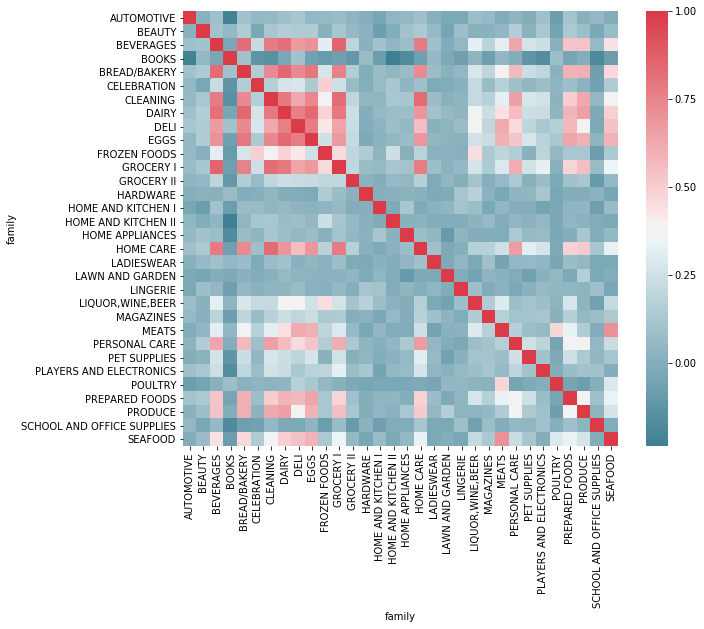

In [960]:
import seaborn as sns
# df1 = item_sales.pivot(columns='family',values='unit_sales') #item_sales#[['class', 'unit_sales']]
df1 = item_sales.pivot_table(index = 'date', columns='family',values='unit_sales', )
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr(method='pearson', min_periods=1)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [969]:
corr

family,AUTOMOTIVE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,1.000000,0.016494,0.096447,-0.219315,0.102650,0.053534,0.061901,0.088311,0.117302,0.052524,...,0.063004,-0.013101,0.032607,0.004755,0.094938,-0.078687,0.109150,0.018975,0.052787,0.000805
BEAUTY,0.016494,1.000000,0.106543,0.056200,0.141960,-0.035842,0.122334,0.156018,0.148560,0.150890,...,0.019402,0.047940,0.156928,0.024617,0.129394,-0.046939,0.135136,0.082883,-0.031775,0.072415
BEVERAGES,0.096447,0.106543,1.000000,-0.036629,0.827506,0.225505,0.778833,0.816206,0.672847,0.704170,...,0.185537,0.328355,0.635498,0.264004,0.246714,0.015548,0.534311,0.539267,0.061820,0.438765
BOOKS,-0.219315,0.056200,-0.036629,1.000000,0.098221,-0.127445,-0.142153,-0.033826,0.104636,-0.062913,...,-0.072539,0.046909,0.001934,-0.119457,-0.165979,0.082418,-0.046797,0.003734,-0.178089,-0.082203
BREAD/BAKERY,0.102650,0.141960,0.827506,0.098221,1.000000,0.157332,0.733010,0.846012,0.734540,0.794233,...,0.197073,0.397818,0.566220,0.236920,0.199417,0.017322,0.595632,0.605333,-0.066927,0.467590
CELEBRATION,0.053534,-0.035842,0.225505,-0.127445,0.157332,1.000000,0.165322,0.268213,0.277713,0.141126,...,0.071527,0.170474,0.090831,0.048821,0.080326,0.035949,0.085573,0.029161,-0.058299,0.147376
CLEANING,0.061901,0.122334,0.778833,-0.142153,0.733010,0.165322,1.000000,0.792062,0.624144,0.742420,...,0.177923,0.328688,0.653778,0.272391,0.259107,0.027962,0.506749,0.628949,0.051664,0.401426
DAIRY,0.088311,0.156018,0.816206,-0.033826,0.846012,0.268213,0.792062,1.000000,0.768362,0.837366,...,0.240761,0.435898,0.560500,0.242195,0.231946,0.037757,0.586376,0.654699,-0.018944,0.494875
DELI,0.117302,0.148560,0.672847,0.104636,0.734540,0.277713,0.624144,0.768362,1.000000,0.774675,...,0.202029,0.619107,0.463310,0.194826,0.127758,0.168211,0.574930,0.380777,-0.024926,0.545394


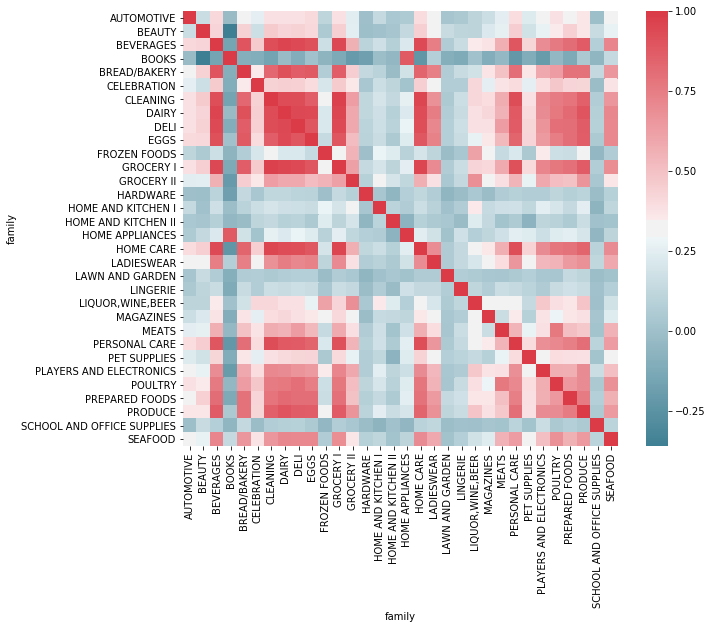

In [947]:
import seaborn as sns
# df1 = item_sales.pivot(columns='family',values='unit_sales') #item_sales#[['class', 'unit_sales']]
df1 = item_sales.pivot_table(index = 'date', columns='family',values='unit_sales', )
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr(method='pearson', min_periods=1)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

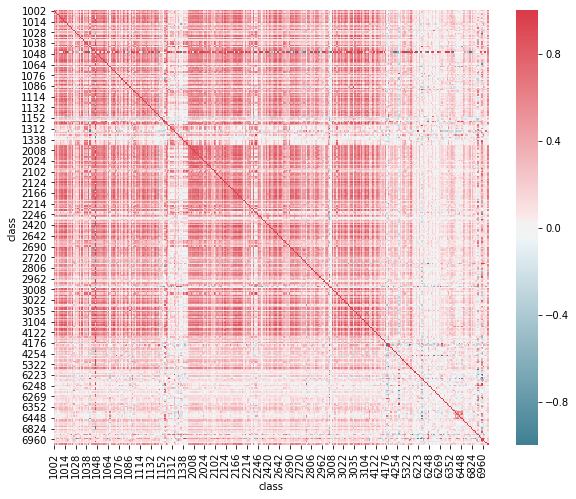

In [948]:
df1 = item_sales.pivot_table(index = 'date', columns='class',values='unit_sales', )
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr(method='pearson', min_periods=1)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [911]:
test = pd.concat([sales, transdates], axis = 1)

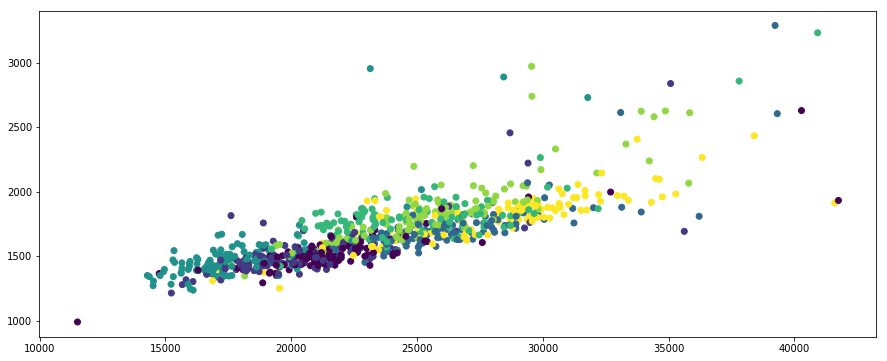

In [912]:
#test[test['month'].isnull()]
plt.scatter(test.dropna()['unit_sales'],test.dropna()['transactions'], c=test.dropna().dow);

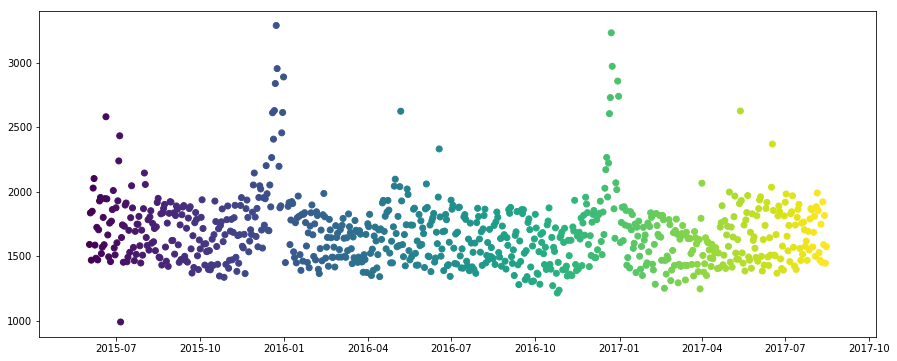

In [913]:
plt.scatter(test.dropna().index, test.dropna()['transactions'], c=test.dropna().index);

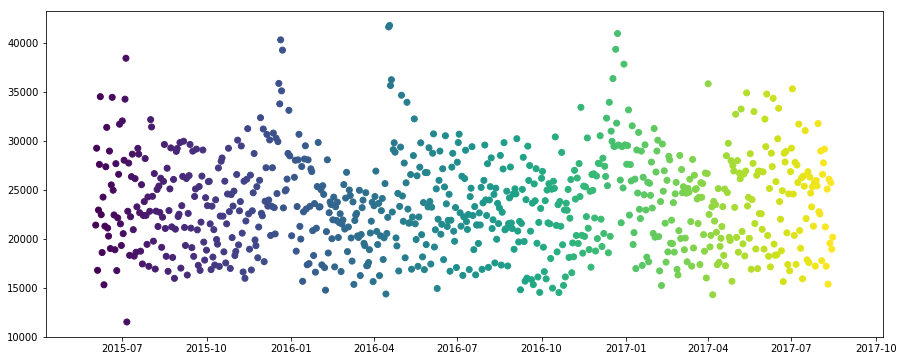

In [914]:
plt.scatter(test.dropna().index, test.dropna()['unit_sales'], c=test.dropna().index);

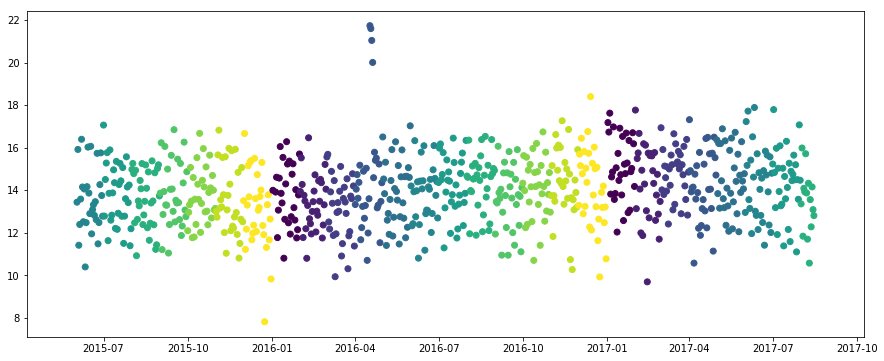

In [915]:
plt.scatter(test.dropna().index, test.dropna()['unit_sales']/test.dropna()['transactions'], c=test.dropna().month);

In [916]:
#hols['date']

In [917]:
test['local_hols']=0
for h in hols['date']:
    #print(h)
    h = h - datetime.timedelta(days = 1)
    rng = ((test.index <= h) & (test.index > (h - datetime.timedelta(days = 5))))
    test.loc[rng, 'local_hols']=5+(test.loc[rng].index-h).days

In [918]:
#national_hols

In [919]:
test['national_hols']=0

for h in national_hols['date']:
    #print(h)
    h = h - datetime.timedelta(days = 1)
    rng = ((test.index <= h) & (test.index > (h - datetime.timedelta(days = 7))))
    test.loc[rng, 'national_hols']+=7+(test.loc[rng].index-h).days

In [920]:
#test[test['hols']>0]
# test.loc[rng]

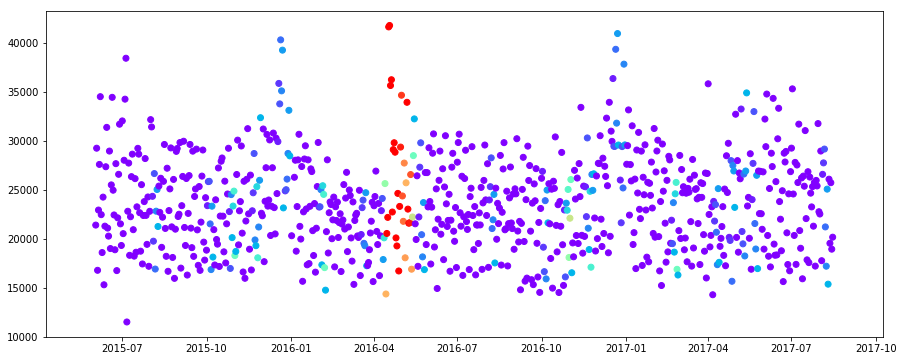

In [921]:
plt.scatter(test.dropna().index, test.dropna()['unit_sales'], c=test.dropna().national_hols, cmap='rainbow');

In [636]:
ts = pd.Series(test['unit_sales'])
ts = ts.asfreq('d', fill_value=ts.mean())
p = np.polyfit(ts.index.values, ts.values, deg = 2)
# p = np.polyfit(test.index.values, test['unit_sales'], deg = 2)

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('float64')

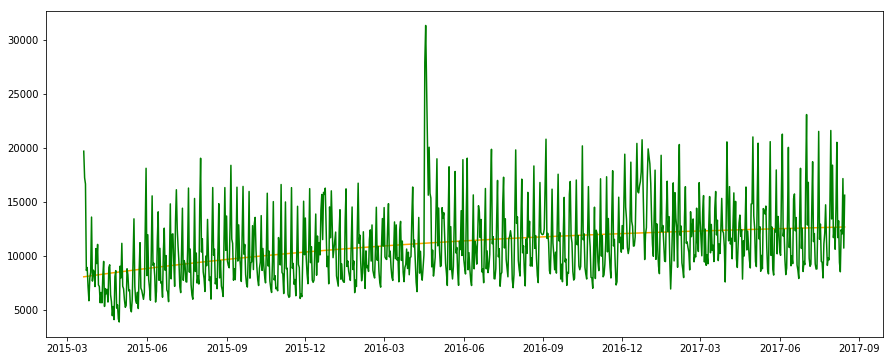

In [637]:
import matplotlib.dates as mdates


from scipy import interpolate

var = 'unit_sales'

x = mdates.date2num(list(test.dropna()[var].index))

#y = test['transactions']

y = test.dropna()[var]

#yinterp = interpolate.UnivariateSpline(x, y, s = 5e8)(x) 



z4 = np.polyfit(x, y, 3)
p4 = np.poly1d(z4)
xx = np.linspace(x.min(), x.max(), int(x.max()-x.min()))

# z4 = np.polyfit(xx, y, 2)
# p4 = np.poly1d(z4)

dd = mdates.num2date(xx)
plt.plot(dd, p4(xx), c='orange')
plt.plot(test.dropna()[var].index, y, c='g')


In [638]:

px = mdates.date2num(datetime.datetime(2019,1,1))
p4(px)

14102.296142578125

In [523]:
len(y)

1655

In [526]:
import matplotlib.dates as mdates
def get_seasonal_func(df, var_name, poly_order = 2):
    x = mdates.date2num(list(df.dropna()[var_name].index))
    y = df.dropna()[var]
    f = np.polyfit(x, y, poly_order)
    p = np.poly1d(f)
    return p

def get_seasonal_value(poly_func, date):
    px = mdates.date2num(date)
    return poly_func(px)

poly_func = get_seasonal_func(test, var_name = 'transactions', poly_order=3)
get_seasonal_value(poly_func, datetime.datetime(2017,1,1))

In [540]:
poly_func = get_seasonal_func(test, var_name = 'transactions', poly_order=3)
get_seasonal_value(poly_func, datetime.datetime(2017,1,1))

5650.1229553222656

In [544]:
test[test['national_hols']>0]

,unit_sales,transactions,dow,month,local_hols,national_hols
date,,,,,,
2013-02-04,2055.271,663.0,0,2,0,1
2013-02-05,2423.703,722.0,1,2,0,3
2013-02-06,2227.867,711.0,2,2,0,5
2013-02-07,1944.988,661.0,3,2,0,7
2013-02-08,2309.529,736.0,4,2,0,9
2013-02-09,2924.104,717.0,5,2,0,11
2013-02-10,2156.248,621.0,6,2,0,13
2013-02-11,2039.570,602.0,0,2,0,7
2013-04-22,2842.965,697.0,0,4,0,1


In [ ]:
import matplotlib.dates as mdates
def get_seasonal_func(df, var_name, poly_order = 2):
    x = mdates.date2num(list(df.dropna()[var_name].index))
    y = df.dropna()[var]
    f = np.polyfit(x, y, poly_order)
    p = np.poly1d(f)
    return p

def get_seasonal_value(poly_func, date):
    px = mdates.date2num(date)
    return poly_func(px)

poly_func = get_seasonal_func(test, var_name = 'transactions', poly_order=3)
get_seasonal_value(poly_func, datetime.datetime(2017,1,1))

In [550]:
test.head()

,unit_sales,transactions,dow,month,local_hols,national_hols
date,,,,,,
2013-01-02,2623.009,708.0,2,1,0,0
2013-01-03,2538.315,689.0,3,1,0,0
2013-01-04,1987.330,689.0,4,1,0,0
2013-01-05,2811.188,749.0,5,1,0,0
2013-01-06,2843.072,667.0,6,1,0,0


In [548]:
test = test.dropna()

In [556]:
item_sales = pd.merge(df,df_items, how = 'left', on='item_nbr')
item_sales.head()

#df[['unit_sales', 'date']].groupby('date').sum()


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,23150,2013-01-02,30,103501,3.0,NaN,CLEANING,3008,0
1,23151,2013-01-02,30,103520,4.0,NaN,GROCERY I,1028,0
2,23152,2013-01-02,30,105576,4.0,NaN,GROCERY I,1045,0
3,23153,2013-01-02,30,105693,5.0,NaN,GROCERY I,1034,0
4,23154,2013-01-02,30,105857,4.0,NaN,GROCERY I,1092,0


In [554]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,23150,2013-01-02,30,103501,3.0,NaN
1,23151,2013-01-02,30,103520,4.0,NaN
2,23152,2013-01-02,30,105576,4.0,NaN
3,23153,2013-01-02,30,105693,5.0,NaN
4,23154,2013-01-02,30,105857,4.0,NaN


In [88]:
fig = plt.figure(figsize=[15,14]);
#fig.add_axes()
ax1 = fig.add_subplot(3,1,1,axisbg='black')
ax2 = fig.add_subplot(3,1,2,axisbg='darkgray')
ax3 = fig.add_subplot(3,1,3,axisbg='lightgray')
ax1.scatter(x = result, y = Y_test, c = Y_test.index, cmap = 'jet', s=65);
#ax2.scatter(x = res.index, y = res, c = Y_test.index, cmap = 'jet', s=25);
ax2.scatter(x = res.index, y = res, c = Y_test, cmap = 'jet', s=15);
ax3.plot(res.sort_index(), c = 'r');
ax3.plot(Y_test.sort_index(), c = 'b');

ax1.set_title('Predicted Vs Actual (coloured by Actual Metro)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

ax2.set_xlabel('Wafer')
ax2.set_ylabel('Predicted Metro')

ax3.set_title('Linear Regression - Wafers in sequence')
ax3.legend(['Prediction', 'Actual'])

DatetimeIndex(['2015-03-20', '2015-03-21', '2015-03-22', '2015-03-23',
               '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27',
               '2015-03-28', '2015-03-29',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=874, freq=None)

ValueError: x and y must be the same size

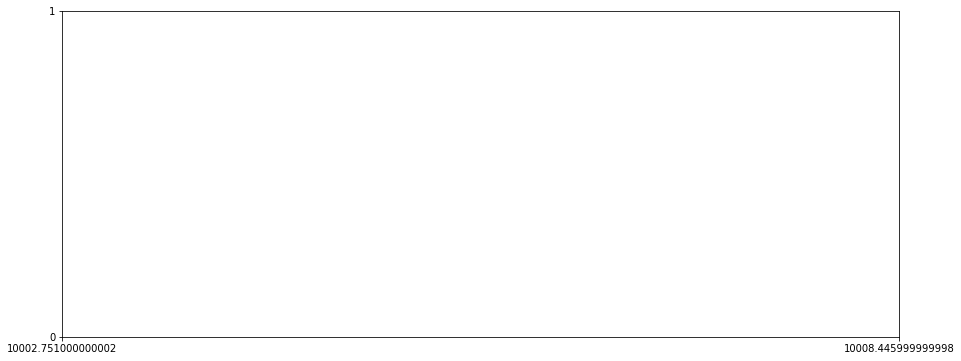

In [29]:
from collections import OrderedDict

show_centroids = True
fig, axs = plt.subplots(3,1, figsize=[15,30],facecolor='darkgray', edgecolor = 'black');
axs = axs.ravel()

# color_by = predicted_cluster_labels_dict

for i, ts_variable in enumerate(ts_vars):
    color_by = predicted_cluster_labels_dict[ts_variable]
    #color_by = row_list_dict['MILLING_COUNTER']
    colors = cmp.rainbow(np.linspace(0, 1, max(color_by)+1))
    [axs[i].plot(g, color=colors[c], label='Cluster ' + str(c)) for g,c in 
             zip(ret_dict[ts_variable], color_by)]# if c in [0,1,2,3,4,5, 6, 7, 8, 9, 10]]
    axs[i].patch.set_facecolor('black')  
        
    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel('Intensity')
    if show_centroids:
        [axs[i].plot(centroid, color=colors[j+1], label = 'Centroid ' + str(j+1), 
                     linewidth = 8) for j, centroid in enumerate(clf_dict[ts_variable].centroids_)];
    handles, labels = axs[i].get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    by_label = dict(sorted(by_label.items(), key=lambda x: x[0]))
    axs[i].legend(by_label.values(), by_label.keys()); #, loc = 'upper left'
    axs[i].set_title(ts_variable)

In [213]:
sales.head()

,unit_sales
date,
2015-03-20,19733.865
2015-03-21,17272.374
2015-03-22,16699.475
2015-03-23,8698.538
2015-03-24,8970.684


In [211]:
dfi = pd.merge(df, df_items, how = 'left', on='item_nbr')

In [220]:
dfig = dfi[['date','family', 'unit_sales']].groupby(['date', 'family']).sum ()
dfig

unit_sales
date       family                                
2015-03-20 AUTOMOTIVE                      14.000
           BEAUTY                           2.000
           BEVERAGES                     1036.000
           BREAD/BAKERY                  1497.000
           CLEANING                      2963.000
           DAIRY                         1083.000
           DELI                           514.431
           EGGS                           173.000
           FROZEN FOODS                    82.406
           GROCERY I                     9367.048
           GROCERY II                      14.000
           HARDWARE                         1.000
           HOME AND KITCHEN I              78.000
           HOME AND KITCHEN II             68.000
           HOME APPLIANCES                  1.000
           LINGERIE                         8.000
           LIQUOR,WINE,BEER               477.000
           MEATS                          311.855
           PERSONAL CARE                 1423.000
           POULTRY                        438.698
           PREPARED FOODS                 166.427
           SEAFOOD                         15.000
2015-03-21 AUTOMOTIVE                      19.000
           BEAUTY                           1.000
           BEVERAGES                     1459.000
           BREAD/BAKERY                  1381.000
           CLEANING                      2637.000
           DAIRY                         1062.000
           DELI                           538.715
           EGGS                           236.000
...                                           ...
2017-08-14 PRODUCE                        870.321
           SCHOOL AND OFFICE SUPPLIES       2.000
           SEAFOOD                          8.000
2017-08-15 AUTOMOTIVE                       5.000
           BEAUTY                           5.000
           BEVERAGES                     3765.000
           BREAD/BAKERY                  1180.000
           CELEBRATION                     13.000
           CLEANING                      1071.000
           DAIRY                          713.000
           DELI                           385.777
           EGGS                           292.000
           FROZEN FOODS                    74.000
           GROCERY I                     4566.328
           GROCERY II                      24.000
           HARDWARE                         2.000
           HOME AND KITCHEN I              33.000
           HOME AND KITCHEN II             18.000
           HOME CARE                      279.000
           LAWN AND GARDEN                  6.000
           LINGERIE                         3.000
           LIQUOR,WINE,BEER                66.000
           MAGAZINES                        4.000
           MEATS                          130.392
           PERSONAL CARE                  216.000
           PLAYERS AND ELECTRONICS          3.000
           POULTRY                        165.984
           PREPARED FOODS                  93.841
           PRODUCE                       2541.333
           SEAFOOD                          4.000

[23778 rows x 1 columns]

In [261]:
test = dfig[dfig.index.get_level_values('family') =='GROCERY I']['unit_sales']
test

date        family   
2015-03-20  GROCERY I    9367.048
2015-03-21  GROCERY I    7567.611
2015-03-22  GROCERY I    7289.500
2015-03-23  GROCERY I    4034.865
2015-03-24  GROCERY I    3907.143
2015-03-25  GROCERY I    3073.881
2015-03-26  GROCERY I    2550.294
2015-03-27  GROCERY I    3891.421
2015-03-28  GROCERY I    3588.373
2015-03-29  GROCERY I    6076.952
2015-03-30  GROCERY I    3377.984
2015-03-31  GROCERY I    3905.579
2015-04-01  GROCERY I    3882.786
2015-04-02  GROCERY I    3197.508
2015-04-03  GROCERY I    4509.333
2015-04-04  GROCERY I    4098.524
2015-04-05  GROCERY I    4640.190
2015-04-06  GROCERY I    3183.778
2015-04-07  GROCERY I    2921.865
2015-04-08  GROCERY I    2287.357
2015-04-09  GROCERY I    2668.849
2015-04-10  GROCERY I    2246.976
2015-04-11  GROCERY I    3194.524
2015-04-12  GROCERY I    3861.921
2015-04-13  GROCERY I    2292.008
2015-04-14  GROCERY I    2891.786
2015-04-15  GROCERY I    3056.952
2015-04-16  GROCERY I    2751.103
2015-04-17  GROCERY I    2

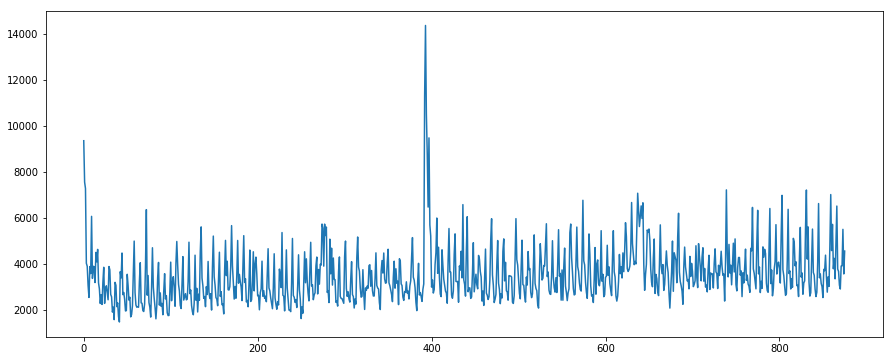

In [262]:
plt.plot(test.get_values())

MultiIndex(levels=[[2015-03-20 00:00:00, 2015-03-21 00:00:00, 2015-03-22 00:00:00, 2015-03-23 00:00:00, 2015-03-24 00:00:00, 2015-03-25 00:00:00, 2015-03-26 00:00:00, 2015-03-27 00:00:00, 2015-03-28 00:00:00, 2015-03-29 00:00:00, 2015-03-30 00:00:00, 2015-03-31 00:00:00, 2015-04-01 00:00:00, 2015-04-02 00:00:00, 2015-04-03 00:00:00, 2015-04-04 00:00:00, 2015-04-05 00:00:00, 2015-04-06 00:00:00, 2015-04-07 00:00:00, 2015-04-08 00:00:00, 2015-04-09 00:00:00, 2015-04-10 00:00:00, 2015-04-11 00:00:00, 2015-04-12 00:00:00, 2015-04-13 00:00:00, 2015-04-14 00:00:00, 2015-04-15 00:00:00, 2015-04-16 00:00:00, 2015-04-17 00:00:00, 2015-04-18 00:00:00, 2015-04-19 00:00:00, 2015-04-20 00:00:00, 2015-04-21 00:00:00, 2015-04-22 00:00:00, 2015-04-23 00:00:00, 2015-04-24 00:00:00, 2015-04-25 00:00:00, 2015-04-26 00:00:00, 2015-04-27 00:00:00, 2015-04-28 00:00:00, 2015-04-29 00:00:00, 2015-04-30 00:00:00, 2015-05-01 00:00:00, 2015-05-02 00:00:00, 2015-05-03 00:00:00, 2015-05-04 00:00:00, 2015-05-05 00: